# DeepSleep 
## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T

Muestreado por 240 seg a 10ms

In [1]:
board="nodemcu"
r = 10
ds = 30
TX = 2

batteries = [0.8, 2, 4, 10] #Ah

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

filename = f"../data/dslp--{board}_r{r}_ds{ds}-T{TX}.csv"

df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 15:17:13.122336,3260,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
1,1,2025-02-28 15:17:13.132188,3270,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
2,2,2025-02-28 15:17:13.141905,3280,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
3,3,2025-02-28 15:17:13.152282,3290,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
4,4,2025-02-28 15:17:13.162295,3300,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
...,...,...,...,...,...,...,...,...
21000,21000,2025-02-28 15:21:13.068586,243197,2025-02-28 15:21:12,5.096,0.01,0.05096,0.001
21001,21001,2025-02-28 15:21:13.079580,243208,2025-02-28 15:21:12,5.096,0.01,0.05096,0.001
21002,21002,2025-02-28 15:21:13.089828,243218,2025-02-28 15:21:12,5.096,0.01,0.05096,0.001
21003,21003,2025-02-28 15:21:13.101826,243230,2025-02-28 15:21:12,5.096,0.01,0.05096,0.001


In [3]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 15:17:13.122336,3260,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
1,1,2025-02-28 15:17:13.132188,3270,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
2,2,2025-02-28 15:17:13.141905,3280,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
3,3,2025-02-28 15:17:13.152282,3290,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
4,4,2025-02-28 15:17:13.162295,3300,1970-01-01 00:00:03,5.096,0.01,0.05096,0.001
...,...,...,...,...,...,...,...,...
21000,21000,2025-02-28 15:21:13.068586,243197,2025-02-28 15:21:12,5.096,0.01,0.05096,0.001
21001,21001,2025-02-28 15:21:13.079580,243208,2025-02-28 15:21:12,5.096,0.01,0.05096,0.001
21002,21002,2025-02-28 15:21:13.089828,243218,2025-02-28 15:21:12,5.096,0.01,0.05096,0.001
21003,21003,2025-02-28 15:21:13.101826,243230,2025-02-28 15:21:12,5.096,0.01,0.05096,0.001


Text(0.5, 1.0, 'Current')

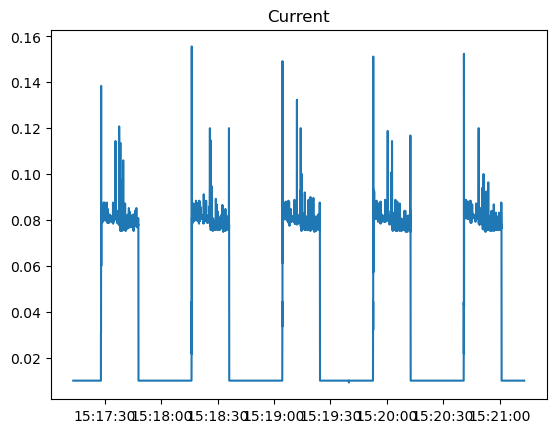

In [4]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

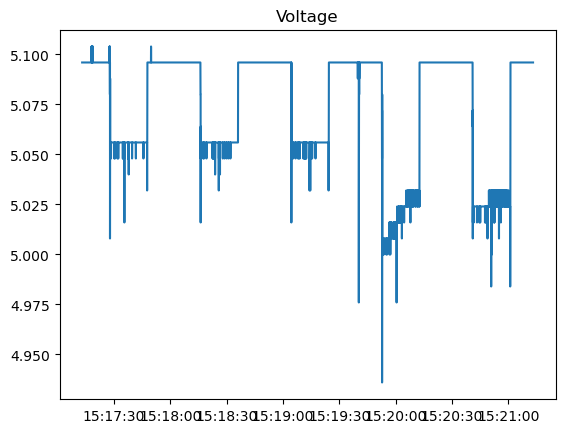

In [5]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [6]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(9.3945267356)

In [7]:
time_span = max(time_data)
time_span #seg

239.989618

In [8]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.03914555476979008)

## Expected runtime using batteries

In [9]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	20.4 hours,	0.85 days
At 2.00Ah:	51.1 hours,	2.13 days
At 4.00Ah:	102.2 hours,	4.26 days
At 10.00Ah:	255.5 hours,	10.64 days
